In [1]:
import csv

import yaml

path = "./simple_tensorflow"

runs_data = [
    "ngc-22.06/gpu/22888496/0",
    "ngc-22.06/gpu/22888496/1",
    "ngc-22.06/gpu/22888496/2",
    "ngc-22.06/gpu/22888496/3",
    "ngc-22.06/gpu/22888496/4",
    "ngc-22.06/gpu/22888507/0",
    "ngc-22.06/gpu/22888507/1",
    "ngc-22.06/gpu/22888507/2",
    "ngc-22.06/gpu/22888507/3",
    "ngc-22.06/gpu/22888507/4",
    "dockerhub-2.9.1/gpu/22888531/0",
    "dockerhub-2.9.1/gpu/22888531/1",
    "dockerhub-2.9.1/gpu/22888531/2",
    "dockerhub-2.9.1/gpu/22888531/3",
    "dockerhub-2.9.1/gpu/22888531/4",
    "dockerhub-2.9.1/gpu/22888536/0",
    "dockerhub-2.9.1/gpu/22888536/1",
    "dockerhub-2.9.1/gpu/22888536/2",
    "dockerhub-2.9.1/gpu/22888536/3",
    "dockerhub-2.9.1/gpu/22888536/4",
    "dockerhub-2.9.1/gpu/22888539/0",
    "dockerhub-2.9.1/gpu/22888539/1",
    "dockerhub-2.9.1/gpu/22888539/2",
    "dockerhub-2.9.1/gpu/22888539/3",
    "dockerhub-2.9.1/gpu/22888539/4",
    "dockerhub-2.9.1/gpu/22888543/0",
    "dockerhub-2.9.1/gpu/22888543/1",
    "dockerhub-2.9.1/gpu/22888543/2",
    "dockerhub-2.9.1/gpu/22888543/3",
    "dockerhub-2.9.1/gpu/22888543/4",
]

runs = []

for run_data in runs_data:

    with open("%s/%s/mnist_convnet_system_info.yaml" % (path, run_data), "r") as file:
        system_info = yaml.safe_load(file)

        run = {}
        run["site_name"] = (
            system_info["env"]["OSG_SITE_NAME"]
            .replace("-Backfill", "")
            .replace("-backfill", "")
        )
        run["hostname"] = system_info["hostname"]
        run["singularity_name"] = (
            system_info["env"]["SINGULARITY_NAME"]
            .replace("-tf2-py3.sif", "")
            .replace("-1.0.0.sif", "")
        )
        run["cpu"] = system_info["env"]["OSG_CPU_MODEL"]

        if type(system_info["gpu"]["nvidia_smi_log"]["gpu"]) == list:
            run["gpu"] = system_info["gpu"]["nvidia_smi_log"]["gpu"][0][
                "product_name"
            ].replace("-PCIE", "")
        else:
            run["gpu"] = system_info["gpu"]["nvidia_smi_log"]["gpu"][
                "product_name"
            ].replace("-PCIE", "")

        runs.append(run)

    with open("%s/%s/bidirectional_lstm_imdb.csv" % (path, run_data), "r") as file:

        run["bidirectional_lstm_imdb"] = []

        csv_reader = csv.reader(file, delimiter=",")
        for row in csv_reader:
            if row[8] != "test_accuracy":
                run["bidirectional_lstm_imdb"].append(float(row[8]))

    with open("%s/%s/imbalanced_classification.csv" % (path, run_data), "r") as file:

        run["imbalanced_classification"] = []

        csv_reader = csv.reader(file, delimiter=",")
        for row in csv_reader:
            if row[8] != "test_accuracy":
                run["imbalanced_classification"].append(float(row[8]))

    with open("%s/%s/mnist_convnet.csv" % (path, run_data), "r") as file:

        run["mnist_convnet"] = []

        csv_reader = csv.reader(file, delimiter=",")
        for row in csv_reader:
            if row[8] != "test_accuracy":
                run["mnist_convnet"].append(float(row[8]))

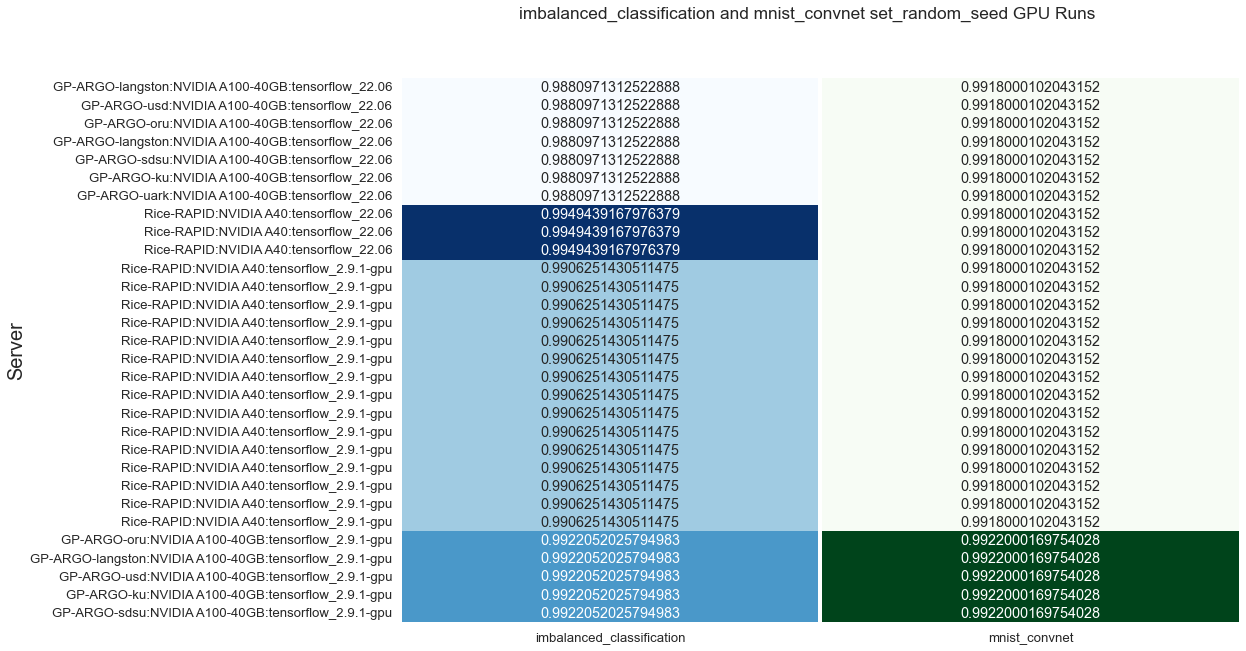

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option("display.precision", 10)

ib_data = []
mc_data = []
y_labels = []

for run in runs:
    ib_data.append([run["imbalanced_classification"][0]])
    mc_data.append([run["mnist_convnet"][0]])
    y_labels.append(
        "%s:%s:%s" % (run["site_name"], run["gpu"], run["singularity_name"])
    )

ib_df = pd.DataFrame(ib_data, index=y_labels, columns=["imbalanced_classification"])
mc_df = pd.DataFrame(mc_data, index=y_labels, columns=["mnist_convnet"])

sns.set(rc={"figure.figsize": (15, 10)})
sns.set(font_scale=1.2)

fig, (ax, ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace=0.01)
sns.heatmap(ib_df, cmap="Blues", ax=ax, fmt=".16f", annot=True, cbar=False)
sns.heatmap(mc_df, cmap="Greens", ax=ax2, fmt=".16f", annot=True, cbar=False)

ax.set_ylabel("Server", fontsize=20)

ax2.set(yticklabels=[])

fig.suptitle("imbalanced_classification and mnist_convnet set_random_seed GPU Runs")

plt.show()

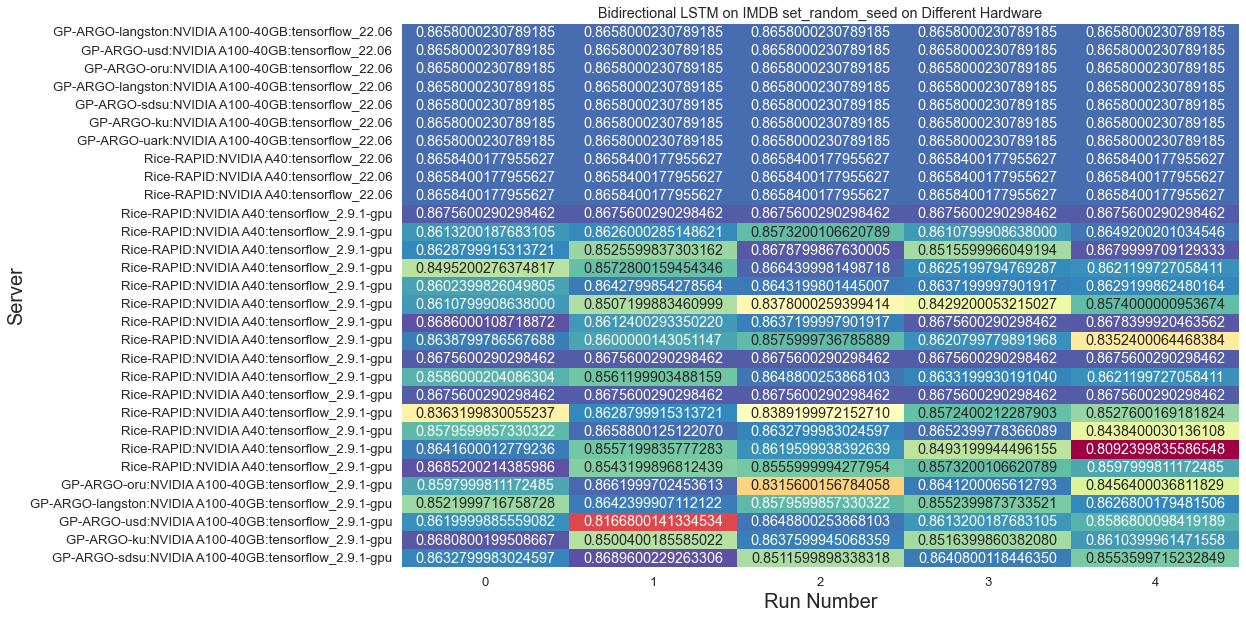

In [3]:
pd.set_option("display.precision", 10)

data = []
y_labels = []

for run in runs:
    data.append(run["bidirectional_lstm_imdb"])
    y_labels.append(
        "%s:%s:%s" % (run["site_name"], run["gpu"], run["singularity_name"])
    )

x_labels = ["0", "1", "2", "3", "4"]

df = pd.DataFrame(data, index=y_labels, columns=x_labels)

sns.set(rc={"figure.figsize": (15, 10)})
sns.set(font_scale=1.2)

ax = sns.heatmap(df, annot=True, fmt=".16f", cbar=False, cmap="Spectral")

ax.set(title="Bidirectional LSTM on IMDB set_random_seed on Different Hardware")
ax.set_xlabel("Run Number", fontsize=20)
ax.set_ylabel("Server", fontsize=20)

plt.show()